# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [5]:
data.shape

(891, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# VISUALIZING NULL VALUE COLUMN

<AxesSubplot:>

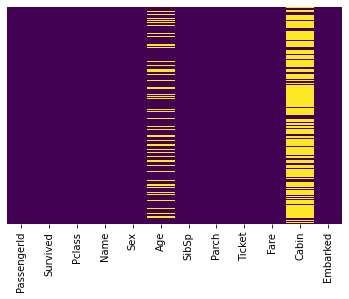

In [8]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

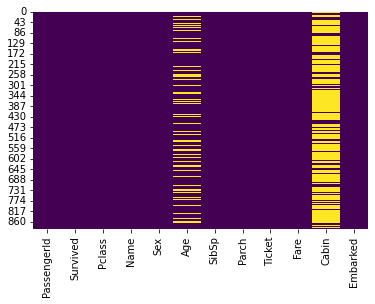

In [9]:
sns.heatmap(data.isnull(),xticklabels=True,cbar=False,cmap='viridis')

1. yticklabels=False,means we dont want to show the records number with respect to its index value.
2. For cmap=viridis the styling grid came.

<AxesSubplot:xlabel='Survived', ylabel='count'>

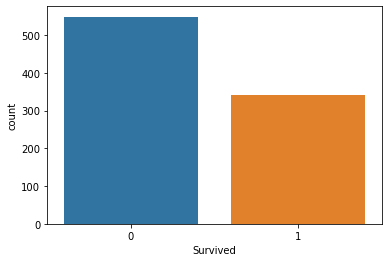

In [10]:
sns.countplot(x='Survived',data=data)

MAXIMUM PEOPLE DIED

<AxesSubplot:xlabel='Survived', ylabel='count'>

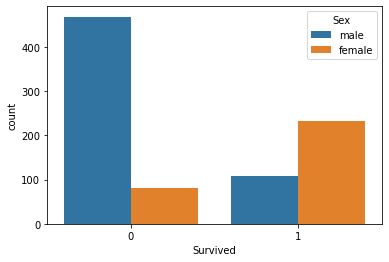

In [11]:
sns.countplot(x='Survived',hue='Sex',data=data)

1. hue='Sex':hue basically divide the survived in male and female part.
2. We can see from the countplot that most of the male died and most of the female survived.

In [12]:
DSC=pd.crosstab(data['Survived'],data['Sex'],margins=True)
DSC

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


<AxesSubplot:xlabel='Survived', ylabel='count'>

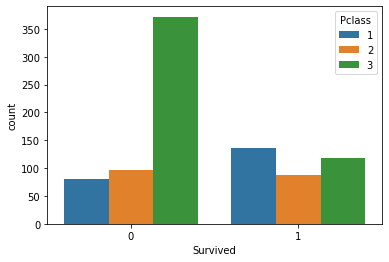

In [13]:
sns.countplot(x='Survived',hue='Pclass',data=data)

Pclass= passenger class(first,second,third class),it took a huge role in survival,because rich passengers gave some money to the sailor and saved themselves.We can see from the countplot that the passengers from class 3 died most and claas 1 survived most.

In [14]:
DSpC=pd.crosstab(data['Survived'],data['Pclass'],margins=True)
DSpC

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


In [15]:
DSpC1=pd.crosstab(data['Age'],data['Pclass'],margins=True)
DSpC1

Pclass,1,2,3,All
Age,,,,
0.42,0,0,1,1
0.67,0,1,0,1
0.75,0,0,2,2
0.83,0,2,0,2
0.92,1,0,0,1
...,...,...,...,...
70.5,0,0,1,1
71.0,2,0,0,2
74.0,0,0,1,1


In [16]:
avg_age=data.groupby('Pclass')['Age'].mean()
avg_age

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [17]:
avg_age1=data.groupby('Survived')['Age'].mean()
avg_age1

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

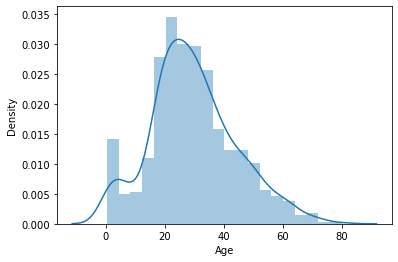

In [18]:
sns.distplot(data['Age'])

In [19]:

survived_below_40 = data[(data["Age"] < 40) & (data["Survived"] == 1)]


print(len(survived_below_40))

229


In [20]:
survivors = data[data["Survived"] == 1]

# Print the age of the survivors
print(survivors["Age"])
    

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64


In [21]:
mean_survived = data[(data["Survived"]==1)].mean()
mean_survived

PassengerId    444.368421
Survived         1.000000
Pclass           1.950292
Age             28.343690
SibSp            0.473684
Parch            0.464912
Fare            48.395408
dtype: float64

In [22]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# Data Cleaning

In [23]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 29
        else:
            return 25
    else:
        return Age

In [24]:
data['Age']=data[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

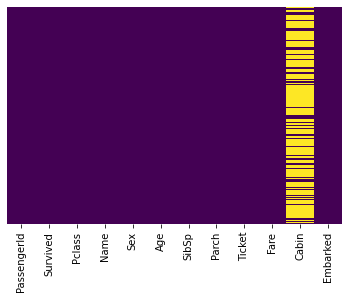

In [25]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [26]:
data.drop('Cabin',axis=1,inplace=True)

In [27]:
print(data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [28]:
print(data['Embarked'].mode()[0])

S


In [29]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [30]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [31]:
data['Sex']=data['Sex'].map({'male':0,'female':1})
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [32]:
embark=pd.get_dummies(data['Embarked'],drop_first=True)

In [33]:
data.drop(['Name','Ticket','Embarked'],axis=1,inplace=True)

In [34]:
data=pd.concat([data,embark],axis=1)

In [35]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,1,0,3,0,22.0,1,0,7.2500,0,1
1,2,1,1,1,38.0,1,0,71.2833,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,1


In [36]:
data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.035388,-0.057527,-0.001652,0.012658,-0.033606,0.022204
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.050118,-0.035322,0.081629,0.257307,0.003650,-0.149683
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.403923,0.083081,0.018443,-0.549500,0.221009,0.074053
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.079949,0.114631,0.245489,0.182333,0.074115,-0.119224
Age,0.035388,-0.050118,-0.403923,-0.079949,1.000000,-0.243110,-0.174824,0.121503,-0.071679,0.008470
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.243110,1.000000,0.414838,0.159651,-0.026354,0.068734
Parch,-0.001652,0.081629,0.018443,0.245489,-0.174824,0.414838,1.000000,0.216225,-0.081228,0.060814
Fare,0.012658,0.257307,-0.549500,0.182333,0.121503,0.159651,0.216225,1.000000,-0.117216,-0.162184
Q,-0.033606,0.003650,0.221009,0.074115,-0.071679,-0.026354,-0.081228,-0.117216,1.000000,-0.499421
S,0.022204,-0.149683,0.074053,-0.119224,0.008470,0.068734,0.060814,-0.162184,-0.499421,1.000000


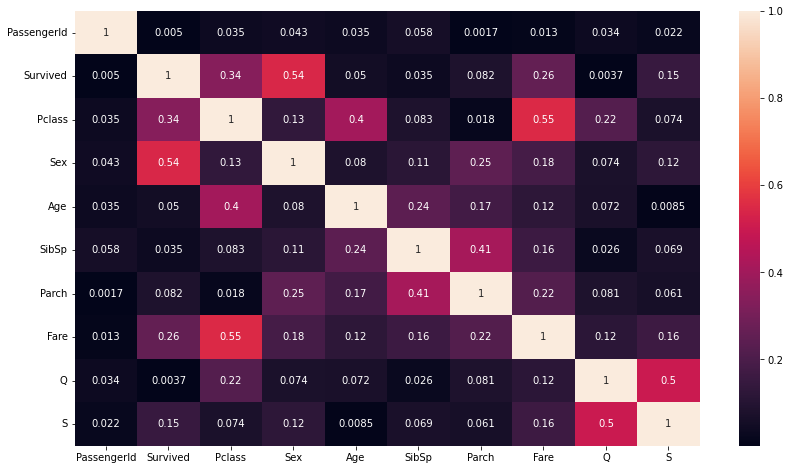

In [37]:
df_corr=data.corr().abs()
plt.figure(figsize=(14,8))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()

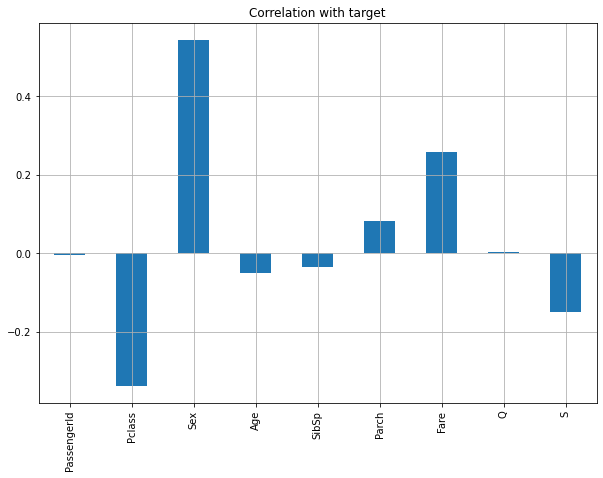

In [38]:
data.drop('Survived',axis=1).corrwith(data.Survived).plot(kind='bar',grid=True,figsize=(10,7),title="Correlation with target")
plt.show()

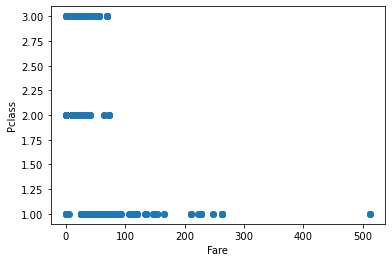

In [39]:
plt.scatter(x=data['Fare'],y=data['Pclass'])
plt.xlabel('Fare')
plt.ylabel('Pclass')
plt.show()

In [40]:
X=data.drop(['PassengerId','Survived'],axis=1)
y=data['Survived']

In [41]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,0,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,0,0
2,3,1,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,1
4,3,0,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0,1
887,1,1,19.0,0,0,30.0000,0,1
888,3,1,25.0,1,2,23.4500,0,1
889,1,0,26.0,0,0,30.0000,0,0


In [42]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# SPLIT THE DATASET

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)


In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
st=StandardScaler()
X_train=st.fit_transform(X_train)
X_test=st.transform(X_test)

In [46]:
X_train

array([[-1.61413602, -0.7243102 ,  1.2497426 , ..., -0.07868358,
        -0.30335547,  0.59248936],
       [-0.40055118, -0.7243102 , -0.45813569, ..., -0.37714494,
        -0.30335547,  0.59248936],
       [ 0.81303367, -0.7243102 ,  0.22501563, ..., -0.47486697,
        -0.30335547,  0.59248936],
       ...,
       [ 0.81303367, -0.7243102 ,  0.90816695, ..., -0.35580399,
        -0.30335547,  0.59248936],
       [-1.61413602,  1.38062393, -1.141287  , ...,  1.68320121,
        -0.30335547,  0.59248936],
       [-1.61413602, -0.7243102 , -0.60994709, ...,  0.86074761,
        -0.30335547,  0.59248936]])

In [86]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print('\n==Train Result==')
        print(f"Accuracy score :{accuracy_score(y_train,y_pred)*100:.2f}%")
    elif train==False:
        pred=clf.predict(x_test)
        print('\n==Test Result==')
        print(f"Accuracy score :{accuracy_score(y_test,pred)*100:.2f}%")
        print('\n\n Test Classification Report\n',classification_report(y_test,pred,digits=2))

#  LogisticRegression

In [47]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [48]:
y_pred1=lr.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.8212290502793296

In [89]:
metric_score(lr,X_train,X_test,y_train,y_test,train=True)
metric_score(lr,X_train,X_test,y_train,y_test,train=False)



==Train Result==
Accuracy score :80.20%

==Test Result==
Accuracy score :82.12%


 Test Classification Report
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [50]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [51]:
precision_score(y_test,y_pred1)

0.8088235294117647

In [52]:
recall_score(y_test,y_pred1)

0.7432432432432432

In [53]:
f1_score(y_test,y_pred1)

0.7746478873239436

In [54]:
confusion_mat = confusion_matrix(y_test,y_pred1)
print(confusion_mat)

[[92 13]
 [19 55]]


# knn

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred2 = knn.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred2))

Accuracy Score: 0.7877094972067039


In [56]:
precision_score(y_test,y_pred2)

0.7647058823529411

In [57]:
f1_score(y_test,y_pred2)

0.7323943661971832

In [58]:
recall_score(y_test,y_pred2)

0.7027027027027027

# SVC

In [59]:
from sklearn.svm import SVC
SVC = SVC()
SVC.fit(X_train,y_train)
pred_y3 = SVC.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,pred_y3))

Accuracy Score: 0.8212290502793296


In [87]:
metric_score(SVC,X_train,X_test,y_train,y_test,train=True)
metric_score(SVC,X_train,X_test,y_train,y_test,train=False)



==Train Result==
Accuracy score :84.83%

==Test Result==
Accuracy score :82.12%


 Test Classification Report
               precision    recall  f1-score   support

           0       0.81      0.90      0.86       105
           1       0.84      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



In [60]:
precision_score(y_test,pred_y3)

0.8387096774193549

In [61]:
f1_score(y_test,pred_y3)

0.7647058823529411

In [62]:
recall_score(y_test,pred_y3)

0.7027027027027027

# DecisionTree

In [63]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(criterion='entropy',random_state=7)
dt.fit(X_train,y_train)
y_pred4 = dt.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred4))

Accuracy Score: 0.7932960893854749


In [64]:
precision_score(y_test,y_pred4)

0.7466666666666667

In [65]:
recall_score(y_test,y_pred4)

0.7567567567567568

In [66]:
f1_score(y_test,y_pred4)

0.7516778523489932

# RandomForestClassifier

In [67]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=1)
RF.fit(X_train, y_train)
y_pred5 = RF.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred5))

Accuracy Score: 0.8156424581005587


In [68]:
precision_score(y_test,y_pred5)

0.7808219178082192

In [69]:
f1_score(y_test,y_pred5)

0.7755102040816327

In [70]:
recall_score(y_test,y_pred5)

0.7702702702702703

In [71]:
import pandas as pd
pd.DataFrame({'Model':['lr','knn','SVC','dt','RF'],'Accuracy':[accuracy_score(y_test,y_pred1)*100,
                                                                         accuracy_score(y_test,y_pred2)*100,
                                                                         accuracy_score(y_test,pred_y3)*100,
                                                                         accuracy_score(y_test,y_pred4)*100,
                                                                         accuracy_score(y_test,y_pred5)*100]})

,Model,Accuracy
0,lr,82.122905
1,knn,78.770950
2,SVC,82.122905
3,dt,79.329609
4,RF,81.564246


# AUC ROC CURVE

In [72]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

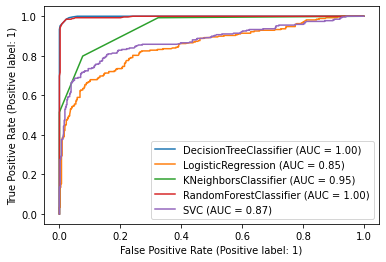

In [73]:
disp=plot_roc_curve(dt,X_train,y_train)
plot_roc_curve(lr,X_train,y_train,ax=disp.ax_)
plot_roc_curve(knn,X_train,y_train,ax=disp.ax_)
plot_roc_curve(RF,X_train,y_train,ax=disp.ax_)
plot_roc_curve(SVC,X_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')
plt.show()

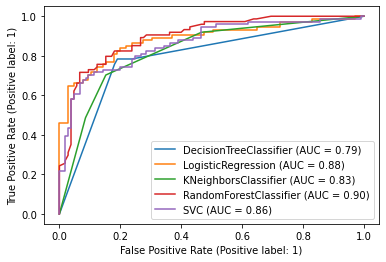

In [74]:
disp=plot_roc_curve(dt,X_test,y_test)
plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)
plot_roc_curve(RF,X_test,y_test,ax=disp.ax_)
plot_roc_curve(SVC,X_test,y_test,ax=disp.ax_)



plt.legend(prop={'size':10},loc='lower right')
plt.show()

SO WE WILL CONSIDER SVC ,BECAUSE ACCURACY IS THE HIGHEST .

# Hyperparameter tuning

In [75]:
from sklearn.model_selection import RandomizedSearchCV


In [82]:
param_grid={'C':[0.1,1,1000],'kernel':['rbf','poly','linear','sigmoid'],'degree':[1,2,3,4,5,6,7]}
grid=RandomizedSearchCV(SVC,param_grid)
grid.fit(X_train,y_train)

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 1000],
                                        'degree': [1, 2, 3, 4, 5, 6, 7],
                                        'kernel': ['rbf', 'poly', 'linear',
                                                   'sigmoid']})

In [83]:
print(grid.best_params_)
print(grid.score(X_test,y_test))

{'kernel': 'rbf', 'degree': 7, 'C': 1}
0.8212290502793296


In [84]:
param_grid1={'C':[0.1,1,1000],'kernel':['rbf','poly','linear','sigmoid'],'degree':[1,2,3,4,5,6,7]}
grid1=GridSearchCV(SVC,param_grid1)
grid1.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 1000], 'degree': [1, 2, 3, 4, 5, 6, 7],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']})

In [85]:
print(grid.best_params_)
print(grid.score(X_test,y_test))

{'kernel': 'rbf', 'degree': 7, 'C': 1}
0.8212290502793296


NO IMPROVEMENT IN ACCURACY 